## Parameter perturbation and spike analysis 

i have done this for sodium ion

In [1]:
from neuron import h,gui
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
soma=h.Section(name="soma")
soma.L=soma.diam = 20   
soma.cm=1     #membrane capacitance(uF/cm2)
soma.insert("hh")

soma

In [3]:
stim=h.IClamp(soma(0.5))
stim.delay=100 #ms
stim.dur=500
stim.amp=0.1    #nA

In [4]:
v=h.Vector().record(soma(0.5)._ref_v)
t=h.Vector().record(h._ref_t)

Spike detection function

In [9]:
def detect_spike(voltage, time, threshold=0):
    spikes=[]
    for i in range(1,len(voltage)):
        if voltage[i-1] < threshold and voltage [i] >= threshold:
            spikes.append(time[i])

    return np.array(spikes)

# Detects upward threshold crossings

# Standard spike detection method

# Avoids counting noise

Simulation runner function

In [10]:
def run_simulation():
    h.tstop=700
    h.v_init=-65
    h.run()

    voltage=np.array(v)
    time=np.array(t)

    spikes=detect_spike(voltage,time)
    firing_rate=len(spikes / (stim.dur / 1000))

    return time, voltage, spikes, firing_rate

    #it  will run one simulationand return values

define scalling factors

In [13]:
gNa_scales= np.linspace(0.5,1.5,7)
firing_rate=[]

#HH sodium conductance is gnabar_hh

In [ ]:
base_gNa=soma.gnabar_hh

for scale in gNa_scales:
    soma.gnabar_hh=base_gNa * scale

    time, voltage, spikes, rate = run_simulation()
    firing_rate.append(rate)

#Only sodium conductance changes

Restore baseline value

In [15]:
soma.gnabar_hh=base_gNa

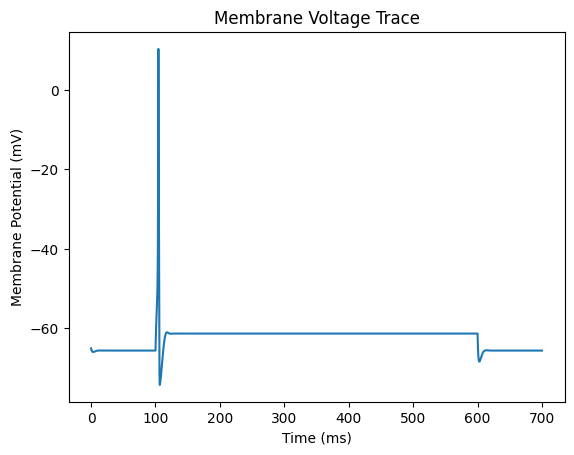

In [16]:
plt.figure()
plt.plot(time, voltage)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Voltage Trace")
plt.show()


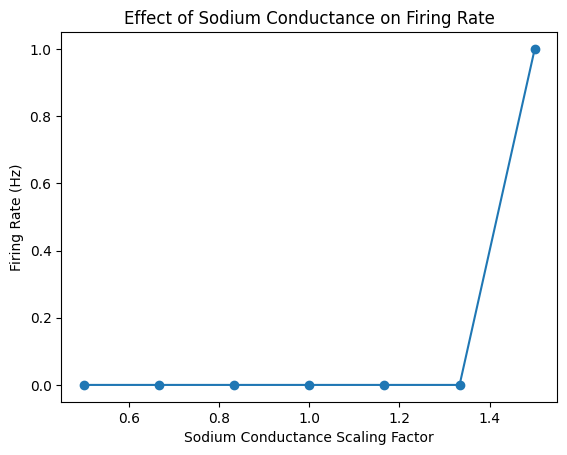

In [18]:
plt.figure()
plt.plot(gNa_scales, firing_rate, marker='o')
plt.xlabel("Sodium Conductance Scaling Factor")
plt.ylabel("Firing Rate (Hz)")
plt.title("Effect of Sodium Conductance on Firing Rate")
plt.show()
